In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Analisis de Datos

In [3]:
dataset=pd.read_csv('../python-ml-course/datasets/wine/winequality-red.csv',sep=';')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Text(0,0.5,'Numero de Vinos')

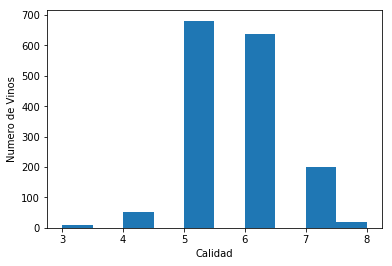

In [34]:
plt.hist(dataset['quality'])
plt.xlabel('Calidad')
plt.ylabel('Numero de Vinos')


## Normalizar dataset

In [5]:
dataset_norm=(dataset-dataset.min())/(dataset.max()-dataset.min())
dataset_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Crear Cluster Jerarquico con Sklearn

In [22]:
from sklearn.cluster import AgglomerativeClustering

Text(0,0.5,'Numero de Vinos')

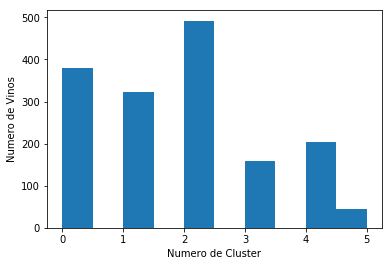

In [39]:
clus=AgglomerativeClustering(n_clusters=6,linkage='ward').fit(dataset_norm)
clusters=pd.Series(clus.labels_)
clusters
plt.hist(clusters)
plt.xlabel('Numero de Cluster')
plt.ylabel('Numero de Vinos')

In [38]:
clus.children_.tolist()

[[0, 4],
 [135, 140],
 [750, 751],
 [753, 1601],
 [1386, 1387],
 [1562, 1563],
 [1564, 1604],
 [1567, 1605],
 [757, 758],
 [1352, 1353],
 [1442, 1446],
 [931, 933],
 [174, 176],
 [103, 105],
 [727, 728],
 [891, 893],
 [1024, 1029],
 [9, 11],
 [39, 40],
 [110, 114],
 [22, 27],
 [1497, 1499],
 [1379, 1380],
 [1115, 1116],
 [1117, 1622],
 [1210, 1212],
 [1295, 1296],
 [1559, 1560],
 [1561, 1626],
 [1400, 1401],
 [284, 285],
 [396, 400],
 [87, 93],
 [193, 194],
 [1336, 1337],
 [1338, 1633],
 [825, 827],
 [1245, 1247],
 [1347, 1348],
 [1173, 1174],
 [1082, 1084],
 [590, 592],
 [853, 854],
 [856, 1641],
 [1265, 1266],
 [1339, 1340],
 [1341, 1644],
 [1343, 1645],
 [251, 254],
 [895, 897],
 [1554, 1557],
 [1249, 1250],
 [1071, 1074],
 [917, 923],
 [279, 283],
 [1056, 1059],
 [1067, 1068],
 [423, 430],
 [513, 514],
 [453, 458],
 [980, 983],
 [1136, 1137],
 [1424, 1425],
 [342, 343],
 [674, 676],
 [970, 971],
 [903, 904],
 [1002, 1006],
 [380, 382],
 [383, 1667],
 [171, 172],
 [628, 630],
 [1418

## Dendograma Truncado

In [41]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [42]:
clusters2=linkage(dataset_norm,method='ward')

<function matplotlib.pyplot.show(*args, **kw)>

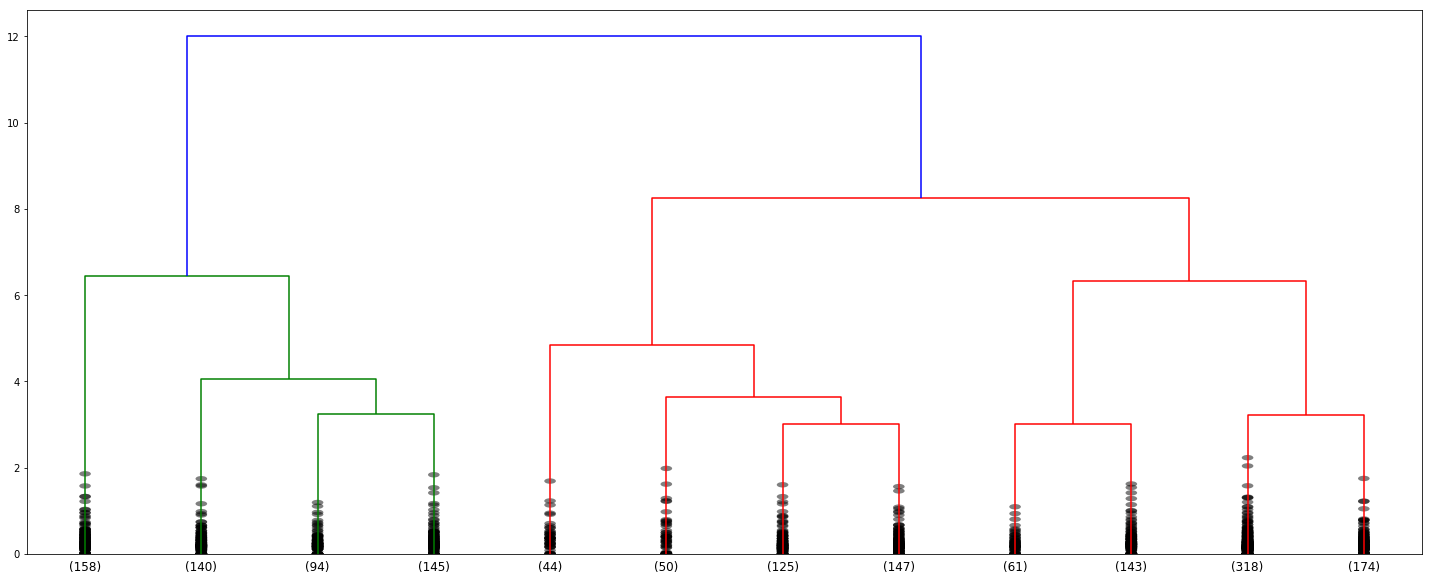

In [43]:
plt.figure(figsize=(25,10))
dendrogram(clusters2,truncate_mode='lastp',p=12,show_contracted=True)
plt.show